<a href="https://colab.research.google.com/github/Cherrymmu/AIFFEL_Online_Quest_Cherry/blob/main/%EB%A9%94%EC%9D%B8%ED%80%98%EC%8A%A4%ED%8A%B83/MainQuest03(rcp).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

3-1. 미니 프로젝트 : 가위바위보 분류기를 만들자
---
오늘 배운 내용을 바탕으로 가위바위보 분류기를 만들도록 하겠습니다. 가장 먼저 해야 할 일은 뭘까요? 네, 첫 번째!!!! 데이터를 준비해야 합니다. 가위바위보 이미지를 모아 놓은 곳은 없으므로, 우리가 직접 사진을 찍어서 모아봅시다.

라이브러리 버전을 확인해 봅니다
사용할 라이브러리 버전을 둘러봅시다.

In [37]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.15.0
1.23.5


아이펠 클라우드에서는 시간이 많이 걸려서 코랩으로 돌림.

그리고 구글 마운트해서 파일 가져옴.

In [38]:
from google.colab import drive
from PIL import Image
import glob
import os

drive.mount('/content/drive')

# 파일 경로 설정
file_path = '/content/drive/MyDrive/rock_scissor_paper'

# 경로 내의 모든 jpg 파일을 불러옴
files = glob.glob(file_path + '/*.jpg')

# 각 파일에 대해
for file in files:
    # 파일을 이미지로 열기
    image = Image.open(file)

print("PIL 라이브러리 import 완료!")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
PIL 라이브러리 import 완료!


In [39]:
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

963  images to be resized.


<ipython-input-39-e1fccb4adcd4>:10: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


963  images resized.
가위 이미지 resize 완료!


In [40]:
# 바위 이미지 만들기
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

1024  images to be resized.


<ipython-input-40-98b161210333>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1024  images resized.
바위 이미지 resize 완료!


In [41]:
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

1140  images to be resized.


<ipython-input-41-af1086e57e4d>:11: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


1140  images resized.
보 이미지 resize 완료!


(6) 숫자 손글씨 인식기는 mnist.load_data() 라는 함수로 데이터를 읽었던 것 기억하시죠? 여러분들이 아직 코딩에 익숙하지 않을 수 있으므로, 가위, 바위, 보 데이터를 읽을 수 있는 load_data() 함수를 만들어 드릴 거예요. 이 코드를 활용하면 임의의 사진 데이터(ex. 귤이 잘 익었나, 안 익었나? 웃는 얼굴인가, 우는 얼굴인가, 평범한 표정의 얼굴인가? 등)에 적용하실 수 있을 겁니다.

load_data() 함수는 입력으로 이미지가 있는 폴더 위치를 받습니다.
여기서는 rock_scissor_paper 폴더 위치를 적어주면 됩니다.

숫자 손글씨는 0~9 까지의 클래스가 있었던 것 기억하시죠?

가위바위보의 경우 3개의 클래스 즉, 가위: 0, 바위: 1, 보: 2 로 라벨링이 될 것입니다.
---


In [42]:
# 코랩 환경 진행이기 때문에 경로가 다르다.
import numpy as np
import glob

def load_data(img_path, number_of_data={"scissor": 963, "rock": 1024, "paper": 1140}):  # 각 카테고리별 이미지 개수를 dictionary 형태로 입력
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(sum(number_of_data.values())*img_size*img_size*color,dtype=np.int32).reshape(sum(number_of_data.values()),img_size,img_size,color)
    labels=np.zeros(sum(number_of_data.values()),dtype=np.int32)

    idx=0
    # 카테고리로 정리했다.
    for category in ["scissor", "rock", "paper"]:
        for file in glob.glob(img_path+'/'+category+'/*.jpg')[:number_of_data[category]]:
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
            labels[idx]=["scissor", "rock", "paper"].index(category)   # 가위 : 0, 바위 : 1, 보 : 2
            idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/rock_scissor_paper'
(x_train, y_train)=load_data(image_dir_path)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 3127 입니다.
x_train shape: (3127, 28, 28, 3)
y_train shape: (3127,)


라벨:  0


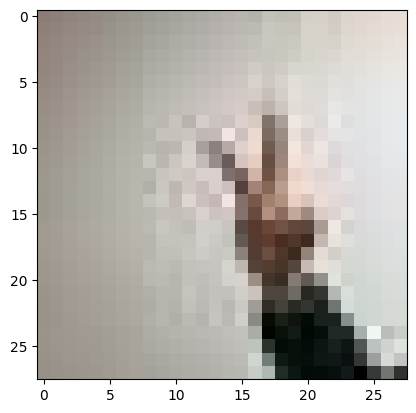

In [44]:
# 노드에서 맷플롯립을 안불러서 불렀다!
import matplotlib.pyplot as plt

plt.imshow(x_train[2])
print('라벨: ', y_train[2])

In [45]:
import tensorflow as tf
from tensorflow import keras

# model을 직접 만들어 보세요.
# Hint! model의 입력/출력부에 특히 유의해 주세요. 가위바위보 데이터셋은 MNIST 데이터셋과 어떤 점이 달라졌나요?

# 파라미터 설정
n_channel_1=20
n_channel_2=40
n_dense=30
n_train_epoch=15

# 모델 정의
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

# 모델 요약
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 26, 26, 20)        560       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 13, 13, 20)        0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 11, 11, 40)        7240      
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 5, 5, 40)          0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 1000)              0         
                                                                 
 dense_8 (Dense)             (None, 30)               

In [46]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.compile()과 model.fit()을 사용해 봅시다.
# 모델 컴파일
model.compile(optimizer='adam', # 아담으로 선택
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_norm, y_train, epochs=n_train_epoch)

Epoch 1/15
98/98 [==============================] - 5s 34ms/step - loss: 1.0052 - accuracy: 0.4854
Epoch 2/15
98/98 [==============================] - 3s 32ms/step - loss: 0.6516 - accuracy: 0.7333
Epoch 3/15
98/98 [==============================] - 2s 20ms/step - loss: 0.3930 - accuracy: 0.8551
Epoch 4/15
98/98 [==============================] - 2s 20ms/step - loss: 0.2559 - accuracy: 0.9060
Epoch 5/15
98/98 [==============================] - 2s 20ms/step - loss: 0.1812 - accuracy: 0.9360
Epoch 6/15
98/98 [==============================] - 2s 20ms/step - loss: 0.1293 - accuracy: 0.9555
Epoch 7/15
98/98 [==============================] - 2s 21ms/step - loss: 0.0998 - accuracy: 0.9680
Epoch 8/15
98/98 [==============================] - 3s 34ms/step - loss: 0.0762 - accuracy: 0.9779
Epoch 9/15
98/98 [==============================] - 3s 33ms/step - loss: 0.0581 - accuracy: 0.9850
Epoch 10/15
98/98 [==============================] - 2s 20ms/step - loss: 0.0553 - accuracy: 0.9862
Epoch 11/

In [51]:
# 테스트 데이터 만들기

# 파일 경로 설정
file_path = '/content/drive/MyDrive/rock_scissor_paper/test'

# 경로 내의 모든 jpg 파일을 불러옴
files = glob.glob(file_path + '/*.jpg')

# 각 파일에 대해
for file in files:
    # 파일을 이미지로 열기
    image = Image.open(file)

print("PIL 라이브러리 import 완료!")

# 가위 데이터
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/scissor'
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

# 바위 데이터
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/rock'
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

# 보 데이터
def resize_images(img_path):
    images=glob.glob(img_path + "/*.jpg")

    print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
    target_size=(28,28)
    for img in images:
        old_img=Image.open(img)
        new_img=old_img.resize(target_size,Image.ANTIALIAS)
        new_img.save(img, "JPEG")

    print(len(images), " images resized.")

# 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test/paper'
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

PIL 라이브러리 import 완료!
321  images to be resized.


<ipython-input-51-73183124196d>:26: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


321  images resized.
가위 이미지 resize 완료!
322  images to be resized.


<ipython-input-51-73183124196d>:47: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


322  images resized.
바위 이미지 resize 완료!
319  images to be resized.


<ipython-input-51-73183124196d>:68: DeprecationWarning: ANTIALIAS is deprecated and will be removed in Pillow 10 (2023-07-01). Use LANCZOS or Resampling.LANCZOS instead.
  new_img=old_img.resize(target_size,Image.ANTIALIAS)


319  images resized.
보 이미지 resize 완료!


In [52]:
# 코랩 환경 진행이기 때문에 경로가 다르다.
import numpy as np
import glob

def load_data(img_path, number_of_data={"scissor": 321, "rock": 322, "paper": 319}):  # 각 카테고리별 이미지 개수를 dictionary 형태로 입력
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(sum(number_of_data.values())*img_size*img_size*color,dtype=np.int32).reshape(sum(number_of_data.values()),img_size,img_size,color)
    labels=np.zeros(sum(number_of_data.values()),dtype=np.int32)

    idx=0
    # 카테고리로 정리했다.
    for category in ["scissor", "rock", "paper"]:
        for file in glob.glob(img_path+'/'+category+'/*.jpg')[:number_of_data[category]]:
            img = np.array(Image.open(file),dtype=np.int32)
            imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
            labels[idx]=["scissor", "rock", "paper"].index(category)   # 가위 : 0, 바위 : 1, 보 : 2
            idx=idx+1

    print("테스트(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

image_dir_path = '/content/drive/MyDrive/rock_scissor_paper/test'
(x_test, y_test)=load_data(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트(x_train)의 이미지 개수는 962 입니다.
x_test shape: (962, 28, 28, 3)
y_test shape: (962,)


In [53]:
# model을 학습시키는 코드를 직접 작성해 보세요.
# Hint! model.evaluate()을 사용해 봅시다.
# 테스트 데이터 정규화
x_test_norm = x_test/255.0

# 테스트 데이터에 대한 예측 정확도 측정
test_loss, test_accuracy = model.evaluate(x_test_norm, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

31/31 - 0s - loss: 2.4901 - accuracy: 0.5603 - 228ms/epoch - 7ms/step
test_loss: 2.4901480674743652 
test_accuracy: 0.560291051864624


더 좋은 네트워크 만들어보기
시험용 데이터x_test에 대한 인식률 test accuracy가 train accuracy보다 많이 낮게 나오지는 않았나요? 만약 그렇다면 그 이유는 무엇일까요? MNIST 손글씨 데이터 때처럼 test accuracy가 train accuracy에 근접하도록 개선 방법을 찾아 봅시다.

노드를 마치며...
여러분 미니 프로젝트는 잘 마치셨나요? 여러분은 이번 노드를 통해 다음의 내용을 배웠습니다.

이미 잘 정제된 10개 클래스의 숫자 손글씨 데이터를 분류하는 classifier 만들기
정제되지 않은 웹캠 사진으로부터 데이터 만들어보기
흑백 사진이 아닌 컬러 사진을 학습하는 classifier 만들기
분류하고자 하는 클래스의 개수를 마음대로 조절하기 (10개에서 3개로)

# 회고

### 트레인 파라미터 설정

: 트레인 파라미터 설정을 처음에 아래와 같이 주었다.

n_channel_1=16
n_channel_2=32
n_dense=30
n_train_epoch=12

그랬는데 accuracy 가 92% 인가? 떠서 그래도 한번 돌려보자 라면서 돌렸다. 그랬눈데 테스트 어큐러씨 무슨일... ㅋㅋㅋㅋㅋㅋ
test_accuracy: 0.36666667461395264 오... 이 모델은 심각하다 생각해서 공부를 더 시키기로 했다.

---
### 트레인 파라미터 설정
n_channel_1=20
n_channel_2=40
n_dense=30
n_train_epoch=15

accuracy 가 96 으로 올랐다.
음.. 좀 나아진듯
그래서 일단 에폭을 더 늘리자 해서 늘렸는데 점수가 많이 좋아졌다.

---

### 트레인 파라미터 설정
n_channel_1=20
n_channel_2=40
n_dense=30
n_train_epoch=20

accuracy가 99% 대로 들어섰다. 오버피팅은 아니길...ㅜ

---

test_loss: 11.594159126281738
test_accuracy: 0.3333333432674408 더 떨어졌네... 이런.. 다음에 모델을 더 크게 만들어 보겠다고 다짐했다.
아... 너무 아쉽--
데이터 더 모을까 아직 시간이 있으니 더 모아보아야겠다.

---

### 결국... 테스트 데이터 더 다운 받아서 만들었다....

### 트레인 파라미터 설정
n_channel_1=20
n_channel_2=40
n_dense=30
n_train_epoch=15
에폭도 줄였다.

학습데이터(x_train)의 이미지 개수는 3127 입니다.

x_train shape: (3127, 28, 28, 3)

y_train shape: (3127,)

테스트(x_train)의 이미지 개수는 628 입니다.

x_test shape: (628, 28, 28, 3)

y_test shape: (628,)

accuracy: 0.9994

test_accuracy: 0.5955414175987244

음.. 아마도 테스트 데이터가 약 200-300개정도 더 들어가야했는데, 퍼센트 조절을 못했던 것 같다.
그래서 테스트 어큐러시가 저렇게 나온거 아닐까하는 안타까움이 들었다.ㅜㅜ 데이터가 좀 더 있었으면 좋았겠다 하는 아쉬움이 생긴다.

---

결국 내 데이터를 300개 더 찍어서 만들었다.
ㅋㅋㅋㅋㅋㅋ하... 100장씩 찍어서 만들고 넣어서 테스트 데이터를 늘려서 돌려보았다.
제발 어큐러시 올라라

테스트(x_train)의 이미지 개수는 962 입니다.

x_test shape: (962, 28, 28, 3)

y_test shape: (962,)

31/31 - 0s - loss: 2.4901 - accuracy: 0.5603 - 228ms/epoch - 7ms/step
test_loss: 2.4901480674743652
test_accuracy: 0.560291051864624

에잇... 이런 너무 아쉽지만 여기에서 마무리 해야겠다.